In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv("carclaims.csv")

In [25]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [27]:
df.iloc[0]

Month                                 Dec
WeekOfMonth                             5
DayOfWeek                       Wednesday
Make                                Honda
AccidentArea                        Urban
DayOfWeekClaimed                  Tuesday
MonthClaimed                          Jan
WeekOfMonthClaimed                      1
Sex                                Female
MaritalStatus                      Single
Age                                    21
Fault                       Policy Holder
PolicyType              Sport - Liability
VehicleCategory                     Sport
VehiclePrice             more than 69,000
PolicyNumber                            1
RepNumber                              12
Deductible                            300
DriverRating                            1
Days:Policy-Accident         more than 30
Days:Policy-Claim            more than 30
PastNumberOfClaims                   none
AgeOfVehicle                      3 years
AgeOfPolicyHolder                2

In [28]:
df.VehiclePrice.unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [29]:
print("Number of Features Available:",df.shape[1])
print("Number of Records Available :",df.shape[0])

Number of Features Available: 33
Number of Records Available : 15420


In [30]:
print("Any missing data?:")
print(df.isnull().sum())

Any missing data?:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


# Data Visualization

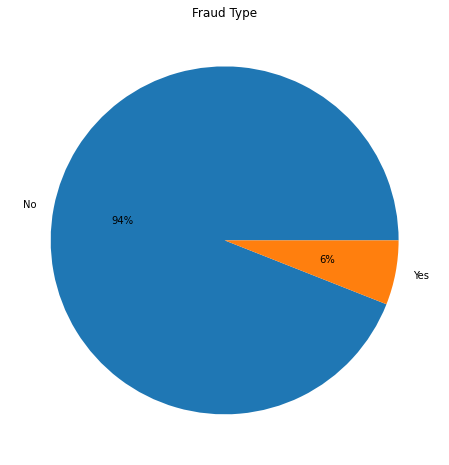

In [31]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

### Only 6% of Claims are detected as Fraud and since this is the target feature, shows the dataset is extremely imbalanced

In [32]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

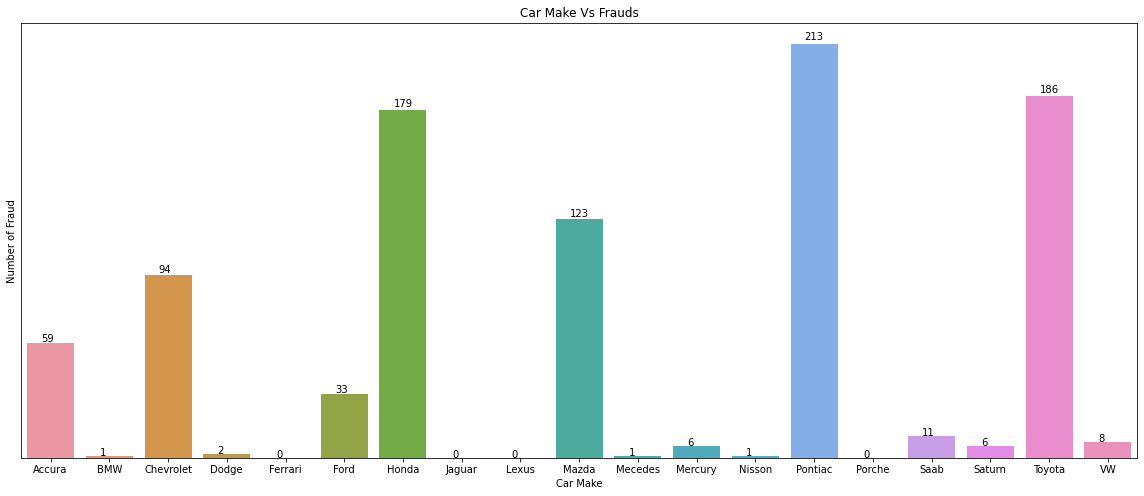

In [33]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index,y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Most of the Fraud Cases found in Pontiac and none in Jaguar,Lexus,Porche and Ferrari

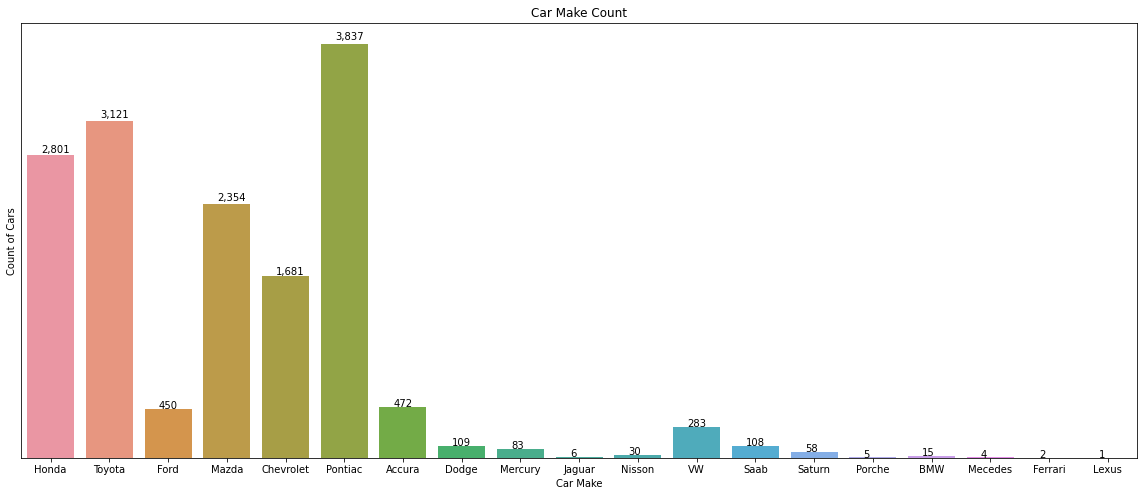

In [34]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")

ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.yticks([])
plt.show()

### The number of cars involved in an accident show why Jaguar,Lexus,Porche and Ferrari have no Fraud Claims while Pontiac have more such claims.

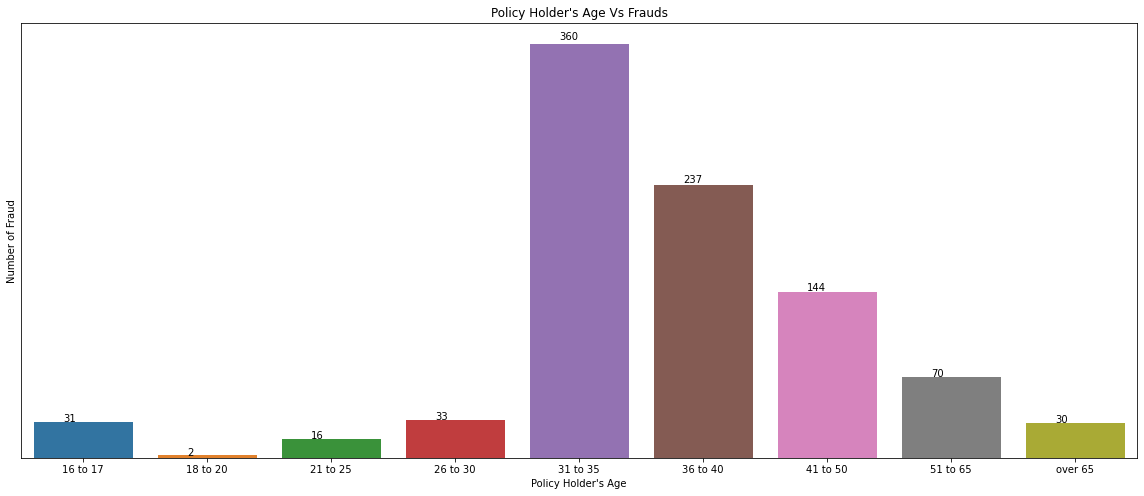

In [35]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Most of the fraud seen are in the age group of 31-35 while the least is 18-20

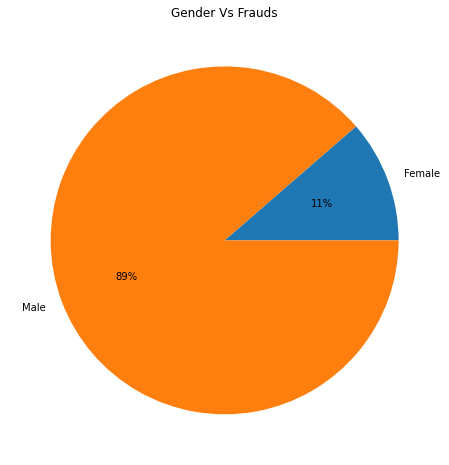

In [36]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

### Fraud by Men is more compared to Women

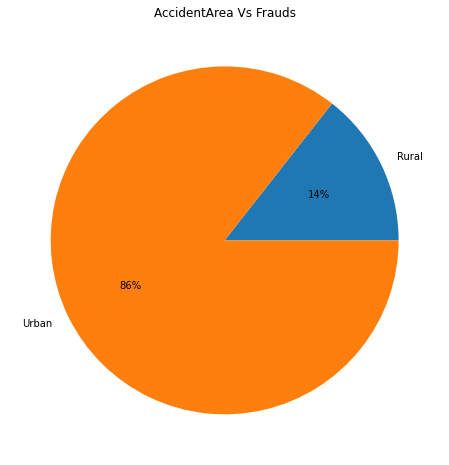

In [37]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

### More Frauds in Urban Area

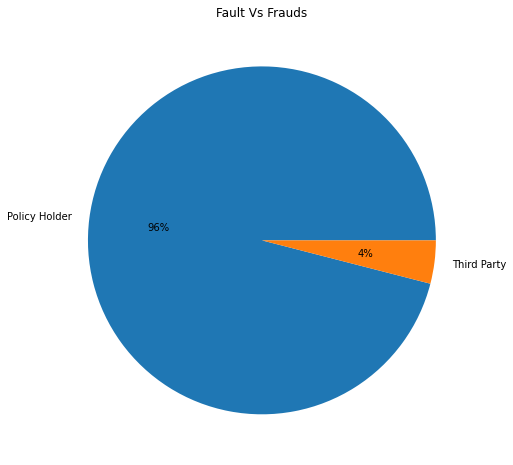

In [38]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

### Clearly, Frauds are done more by Policy Holders

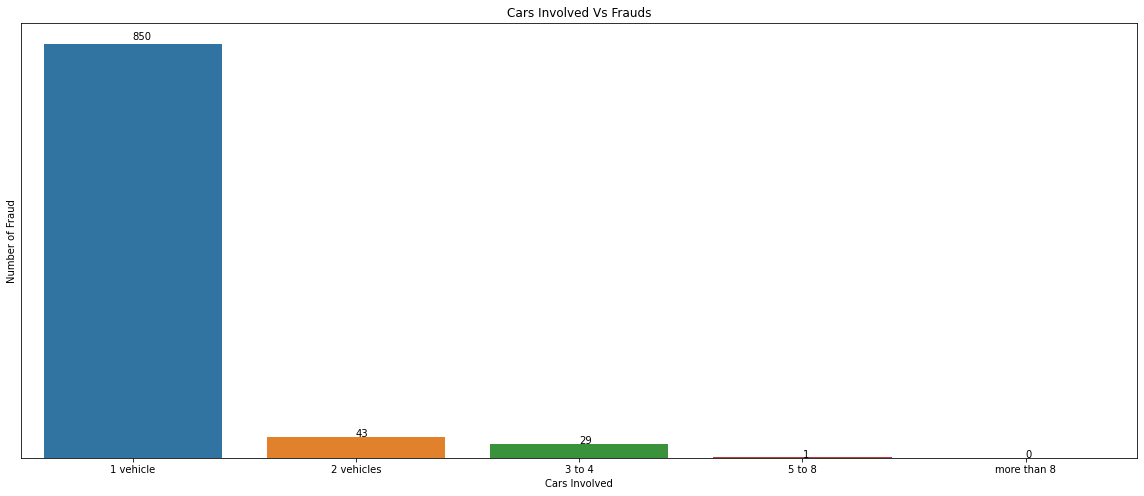

In [39]:

cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Frauds are more when only a single vehicle is involved

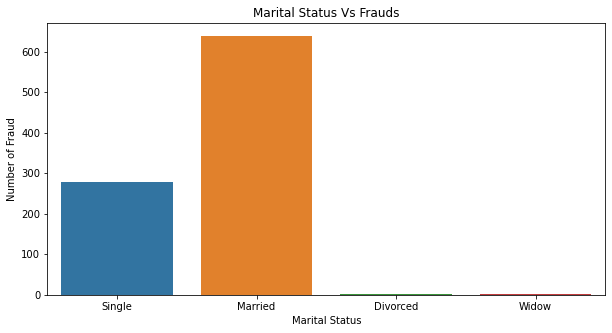

In [40]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(10,5))
plt.title("Marital Status Vs Frauds")
sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

In [41]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,1
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,0
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,1
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,0


In [42]:
df.iloc[0]

Month                                 Dec
WeekOfMonth                             5
DayOfWeek                       Wednesday
Make                                Honda
AccidentArea                        Urban
DayOfWeekClaimed                  Tuesday
MonthClaimed                          Jan
WeekOfMonthClaimed                      1
Sex                                Female
MaritalStatus                      Single
Age                                    21
Fault                       Policy Holder
PolicyType              Sport - Liability
VehicleCategory                     Sport
VehiclePrice             more than 69,000
PolicyNumber                            1
RepNumber                              12
Deductible                            300
DriverRating                            1
Days:Policy-Accident         more than 30
Days:Policy-Claim            more than 30
PastNumberOfClaims                   none
AgeOfVehicle                      3 years
AgeOfPolicyHolder                2

### Married are involved in more frauds

In [43]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

In [44]:
import joblib

In [45]:
joblib.dump(le, "label_encoder.joblib")

['label_encoder.joblib']

In [46]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,...,3,0,0,0,3,0,2,0,2,0
1,4,3,6,6,1,2,5,4,1,2,...,4,1,0,0,3,3,0,0,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,3,3,0,0,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,2,3,0,0,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,3,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,0,0,0,3,3,0,2,1,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,0,0,0,2,3,2,2,2,0
15417,9,5,4,17,0,1,3,1,1,2,...,3,0,0,0,0,3,0,2,1,1
15418,2,1,1,17,1,5,3,2,0,1,...,4,0,0,0,2,3,0,2,0,0


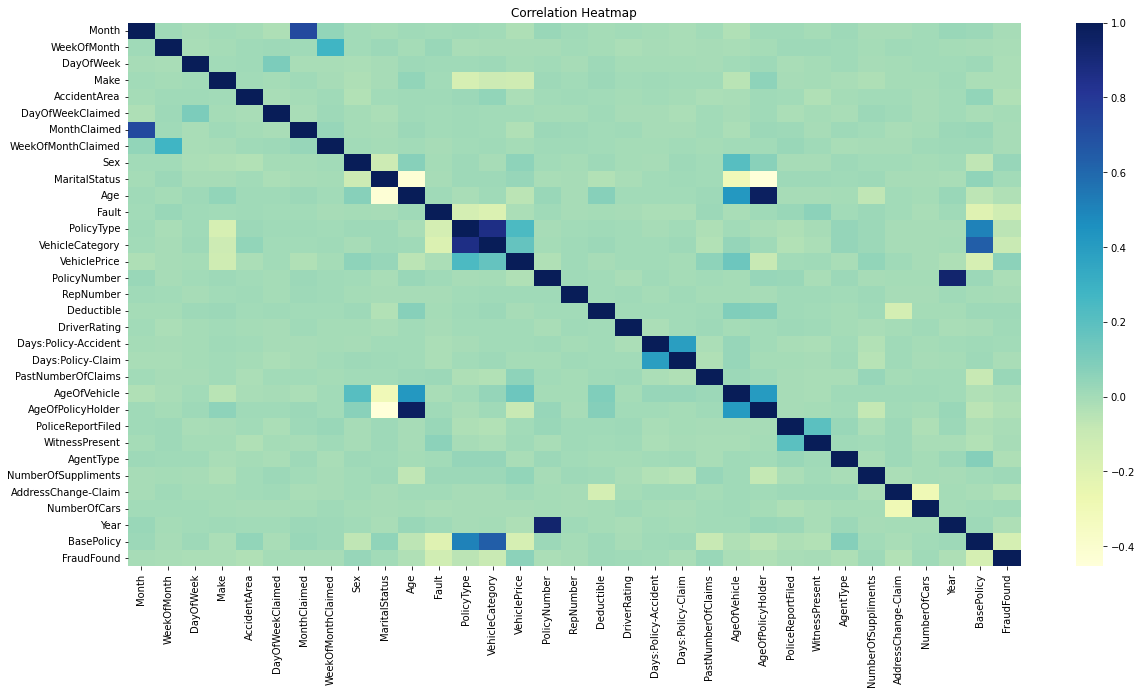

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### Can see some strong correlation between some features and we can ignore/remove them

In [48]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

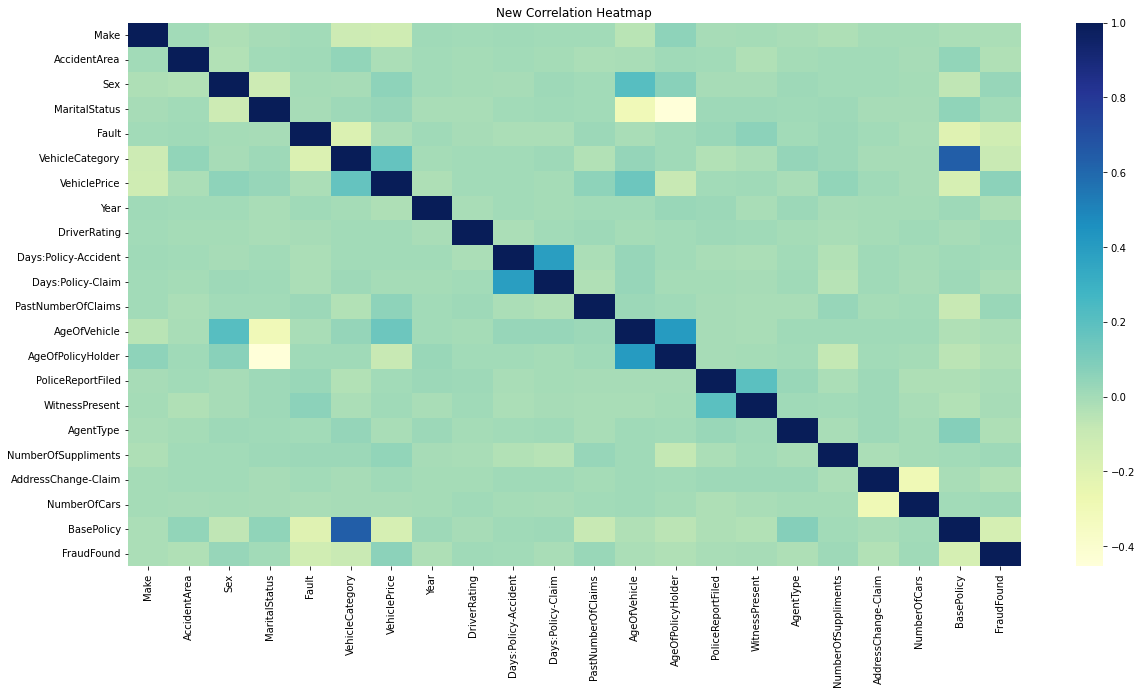

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

### There still appears some correlation between BasePolicy and VehicleCategory but will leave it for now

In [50]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))

    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

# Data Modeling

In [51]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 21), (3855, 21), (11565, 1), (3855, 1))

# Logistic Regression

Accuracy of thie model:		 0.9398184176394293


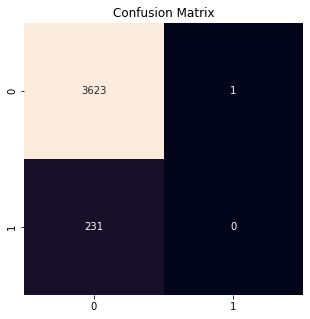

In [52]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Accuracy of thie model:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

# RandomForest Classifier

Accuracy of thie model:		 0.9395590142671855


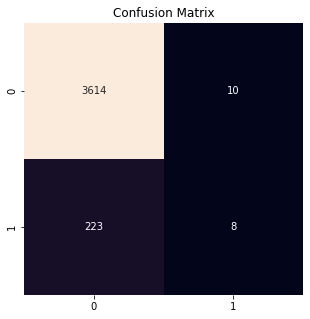

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of thie model:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

## The dataset is extremely imbalanced and will not give accurate information. This can be overcome by one of the two ways :
    Upscale the Minority Class    (FraudFound ==1) in this case
    Downsample the Majority Class (FraudFound ==0) in this case

# 1. Upscale the Minority Class

In [54]:
n = df_new.FraudFound.value_counts()[0]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

0    14497
1    14497
Name: FraudFound, dtype: int64

In [55]:
X = df_upsampled.drop('FraudFound',axis=1)
y = df_upsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21745, 21), (7249, 21), (21745, 1), (7249, 1))

## Logistic Regression

Accuracy of thie model:		 0.7373430818043868


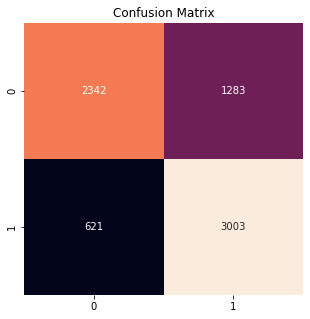

In [56]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_upscale_pred = lr.predict(X_test)

acc_lr_upscale=accuracy_score(y_test, lr_upscale_pred)
print("Accuracy of thie model:\t\t",acc_lr_upscale)
conf_matrix(y_test,lr_upscale_pred)

# RandomForest Classifier

Accuracy of thie model:		 0.9860670437301696


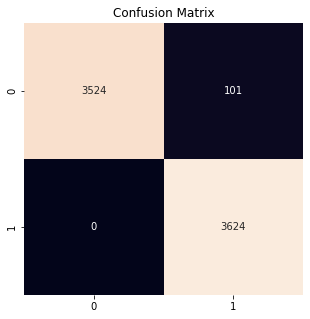

In [57]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy of thie model:\t\t",acc_rfc_upscale)
conf_matrix(y_test,rfc_upscale_pred)

# DownSample Majority Class

In [58]:
n = df_new.FraudFound.value_counts()[1]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled.FraudFound.value_counts()

1    923
0    923
Name: FraudFound, dtype: int64

In [59]:
X = df_downsampled.drop('FraudFound',axis=1)
y = df_downsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1384, 21), (462, 21), (1384, 1), (462, 1))

# Logistic Regression

Accuracy of thie model:		 0.7554112554112554


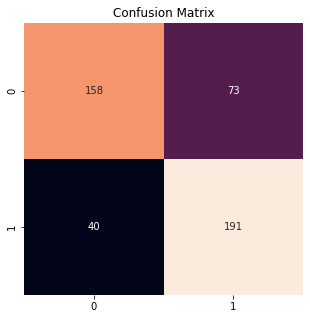

In [60]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_downscale_pred = lr.predict(X_test)

acc_lr_downscale=accuracy_score(y_test, lr_downscale_pred)
print("Accuracy of thie model:\t\t",acc_lr_downscale)
conf_matrix(y_test,lr_downscale_pred)

# RandomForest Classifier

Accuracy of thie model:		 0.7597402597402597


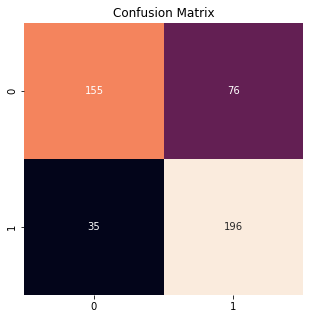

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_downscale_pred = rfc.predict(X_test)

acc_rfc_downscale=accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy of thie model:\t\t",acc_rfc_downscale)
conf_matrix(y_test,rfc_downscale_pred)

In [63]:
X_train.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'Year', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

# Comparison of Various Models

In [33]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression',
                 'RandomForest Classifier','UpScale RandomForest Classifier','DownScale RandomForest Classifier'],

        'Accuracy Score':[acc_lr,acc_lr_upscale,acc_lr_downscale,acc_rfc,acc_rfc_upscale,acc_rfc_downscale]}

comparision_table=pd.DataFrame(data)
print(comparision_table)

                               Model  Accuracy Score
0                Logistic Regression        0.939559
1        UpScale Logistic Regression        0.741482
2      DownScale Logistic Regression        0.735931
3            RandomForest Classifier        0.938003
4    UpScale RandomForest Classifier        0.988274
5  DownScale RandomForest Classifier        0.777056


In [34]:
import pickle

# Save the model
with open('rfc_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [39]:
import joblib

# Save the model
joblib.dump(rfc, "rfc_model.joblib")

# Load the model
model = joblib.load("rfc_model.joblib")

In [35]:
X_test.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'Year', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [41]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/ntipl/miniconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [36]:
X_test.iloc[0]

Make                    15
AccidentArea             1
Sex                      1
MaritalStatus            1
Fault                    0
VehicleCategory          1
VehiclePrice             1
Year                     1
DriverRating             3
Days:Policy-Accident     3
Days:Policy-Claim        2
PastNumberOfClaims       1
AgeOfVehicle             6
AgeOfPolicyHolder        6
PoliceReportFiled        0
WitnessPresent           0
AgentType                0
NumberOfSuppliments      2
AddressChange-Claim      3
NumberOfCars             0
BasePolicy               2
Name: 8468, dtype: int64

In [42]:
import joblib

# Load the model file
model = joblib.load("rfc_model.joblib")

# Inspect the model
print(model)


RandomForestClassifier()
